In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
from decimal import Decimal
sys.path.append("/net/home/bjagger/mmvt_seekr")
import mmvt_seekr as seekr
import numpy as np
#import numpy as np

ModuleNotFoundError: No module named 'mmvt_seekr'

In [2]:
bound_states = [0]
verbose=False
conv_stride = 100000

# Calculate kinetics with full data

In [1]:
model, max_steps = seekr.model.make_model(milestone_filename="/home/lvotapka/tmp/bcd_aspirin_tut/milestones.xml")
p_equil, N, R, T, T_tot, Q, n_conv, r_conv, k_cell= seekr.analyze.analyze_kinetics(model, bound_states, verbose=True,)
MFPT = T[0]
k_off = 1/MFPT


NameError: name 'seekr' is not defined

In [4]:
k_on = seekr.analyze.calc_kon_from_bd(model, bound_states, Q)


In [5]:
print("MLE k_on", '%.2E' % Decimal(k_on), "M^-1 s^-1")
print("MLE k_off", '%.2E' % Decimal(k_off), "s^-1")


MLE k_on 4.29E+09 M^-1 s^-1
MLE k_off 6.10E+06 s^-1


In [6]:
num = 500
skip = 100
stride = 100


In [7]:
k_off_list, running_avg, running_std, k_on_list, k_on_avg_list, k_on_std_list = seekr.analyze.monte_carlo_milestoning_error(
    model, bound_states, Q, N, R, p_equil ,T_tot, num=num, skip =skip,stride = stride, verbose=False)
k_off_std = np.std(k_off_list)
k_on_std = np.std(k_on_list)



In [8]:
print("k_off entries:", len(k_off_list))
print("avg k off", '%.2E' % Decimal(np.average(k_off_list))," +- ", '%.2E' % Decimal(k_off_std), " s^-1") 
print("avg k on", '%.2E' % Decimal(np.average(k_on_list))," +- ", '%.2E' % Decimal(k_on_std), " M^-1 s^-1")

k_off entries: 499
avg k off 6.10E+06  +-  1.54E+03  s^-1
avg k on 4.29E+09  +-  2.62E+05  M^-1 s^-1


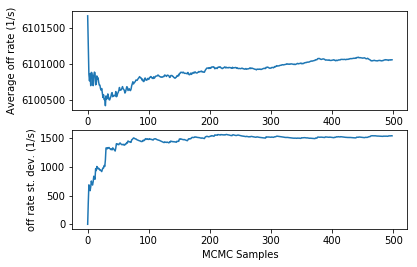

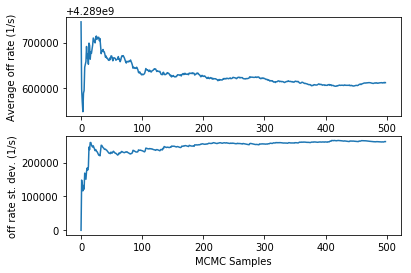

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa2ad30e828>)

In [9]:
seekr.plots.MCMC_conv(running_avg, running_std)
seekr.plots.MCMC_conv(k_on_avg_list, k_on_std_list)


# Milestone Convergence

In [10]:
conv_stride = 500000 #1 ns stride
conv_skip = 5000000 #skip first 10 ns

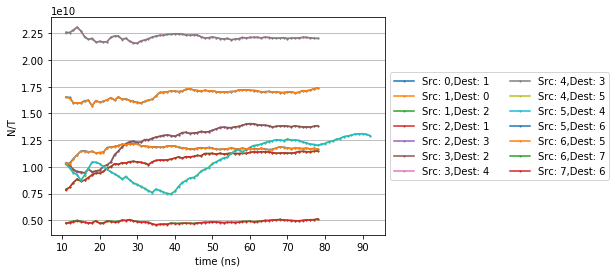

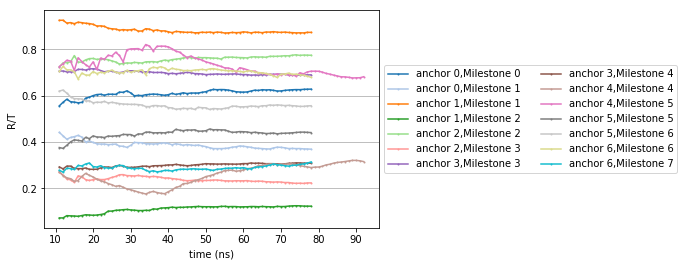

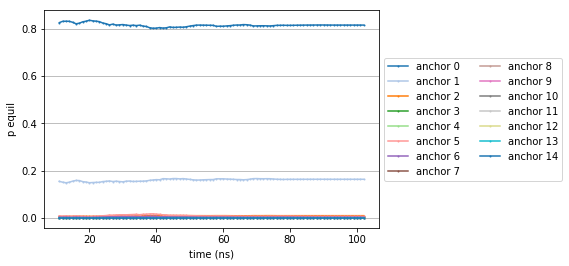

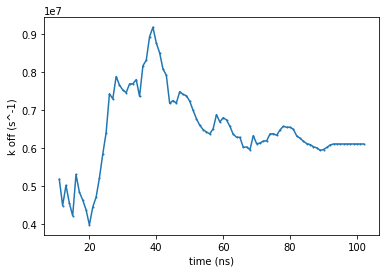

In [11]:
bound_dict = [0]
N_conv, R_conv, k_cell_conv, p_equil_conv, k_conv, k_on_conv, conv_intervals = seekr.analyze.check_milestone_convergence(
    model, bound_states, conv_stride, conv_skip, max_steps,)

n_fig, ax = seekr.plots.plot_n_conv(N_conv, conv_intervals)
r_fig = seekr.plots.plot_r_conv(R_conv, conv_intervals)
p_fig, ax = seekr.plots.plot_p_equil(p_equil_conv, conv_intervals)
k_fig, ax = seekr.plots.plot_k_off_conv(k_conv, conv_intervals)

# Determine Minimum Simulation times from RMSD windows

In [12]:
print(len(conv_intervals))

92


In [13]:
window = 30 # 30 ns
cutoff = 0.05 #5%
conv_windows = 20 # 50 ns

Calculating N/T convergence
Calculating R/T convergence
anchor 0 30000000.0
anchor 1 30000000.0
anchor 2 30000000.0
anchor 3 30000000.0
anchor 4 45000000.0
anchor 5 30000000.0
anchor 6 30000000.0
[30000000. 30000000. 30000000. 30000000. 45000000. 30000000. 30000000.
        0.        0.        0.        0.        0.        0.        0.
        0.]


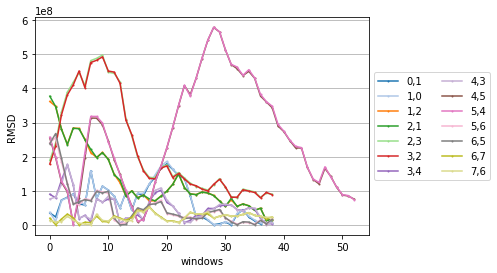

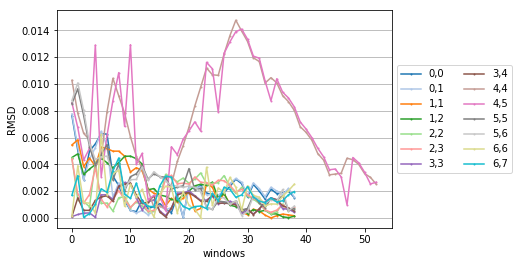

In [14]:

seekr.plots.plot_window_rmsd(N_conv, conv_intervals, window)
seekr.plots.plot_window_rmsd(R_conv, conv_intervals, window)
min_anchor_times = seekr.analyze.calc_RMSD_conv(model, N_conv, R_conv, conv_intervals, window, cutoff, conv_windows)
print(min_anchor_times)

In [15]:
p_equil, N, R, T, T_tot, Q, n_conv, r_conv, k_cell= seekr.analyze.analyze_kinetics(
     model, bound_states, max_steps = min_anchor_times, verbose=True,)
k_off_list, running_avg, running_std,k_on_list, k_on_avg_list, k_on_std_list = seekr.analyze.monte_carlo_milestoning_error(
    model, bound_states, Q, N, R, p_equil,T_tot, num = 500, skip =100,stride = 100, verbose=False)
#seekr.plots.MCMC_conv(running_avg, running_std)

max_steps [30000000. 30000000. 30000000. 30000000. 45000000. 30000000. 30000000.
        0.        0.        0.        0.        0.        0.        0.
        0.]
Anchor 0_0_site1_-0.0_-0.1_1.0
counts {'0': {0: {1: 1030}, 1: {0: 1030}}}
times {'0': {0: 3.693749999999993e-08, 1: 2.2915660000000022e-08}}
cell times {0: 6.000504000000001e-08}
Anchor 1_1_site1_-0.1_-0.3_2.5
counts {'1': {1: {2: 681}, 2: {1: 681}}}
times {'1': {1: 5.257578000000003e-08, 2: 7.212620000000001e-09}}
cell times {0: 6.000504000000001e-08, 1: 6.000092e-08}
Anchor 2_2_site1_-0.1_-0.5_4.0
counts {'2': {3: {2: 843}, 2: {3: 842}}}
times {'2': {3: 1.3955500000000005e-08, 2: 4.587611999999998e-08}}
cell times {0: 6.000504000000001e-08, 1: 6.000092e-08, 2: 6.000054000000001e-08}
Anchor 3_3_site1_-0.2_-0.7_5.5
counts {'3': {3: {4: 1327}, 4: {3: 1327}}}
times {'3': {3: 4.149595999999997e-08, 4: 1.841962000000002e-08}}
cell times {0: 6.000504000000001e-08, 1: 6.000092e-08, 2: 6.000054000000001e-08, 3: 6.000048e-08}
Anchor

In [16]:
MFPT = T[0]
k_off = 1/MFPT
print("MLE k_off", '%.2E' % Decimal(k_off))
k_off_std = np.std(k_off_list)
k_on_std = np.std(k_on_list)
print("k_off entries:", len(k_off_list))
print("avg k off", '%.2E' % Decimal(np.average(k_off_list))," +- ", '%.2E' % Decimal(k_off_std), " s^-1") 
print("avg k on", '%.2E' % Decimal(np.average(k_on_list))," +- ", '%.2E' % Decimal(k_on_std), " M^-1 s^-1")

MLE k_off 5.93E+06
k_off entries: 499
avg k off 5.93E+06  +-  1.49E+03  s^-1
avg k on 4.46E+09  +-  2.27E+05  M^-1 s^-1


In [17]:
window = 30 # 30 ns
cutoff = 0.01 #1%
conv_windows = 20 # 20 ns

Calculating N/T convergence
Entry 1, 0 did not meet minimum convergence criteria of 20 windows
Entry 1, 2 did not meet minimum convergence criteria of 20 windows
Entry 2, 1 did not meet minimum convergence criteria of 20 windows
Entry 2, 3 did not meet minimum convergence criteria of 20 windows
Entry 3, 2 did not meet minimum convergence criteria of 20 windows
Entry 4, 5 did not meet minimum convergence criteria of 20 windows
Entry 5, 4 did not meet minimum convergence criteria of 20 windows
Calculating R/T convergence
Entry 1, 2 did not meet minimum convergence criteria of 20 windows
Entry 2, 3 did not meet minimum convergence criteria of 20 windows
Entry 4, 4 did not meet minimum convergence criteria of 20 windows
Entry 4, 5 did not meet minimum convergence criteria of 20 windows
anchor 0 33500000.0
anchor 3 30000000.0
anchor 5 39000000.0
anchor 6 39000000.0
[33500000.        0.        0. 30000000.        0. 39000000. 39000000.
        0.        0.        0.        0.        0.      

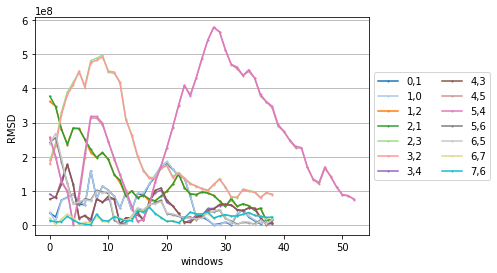

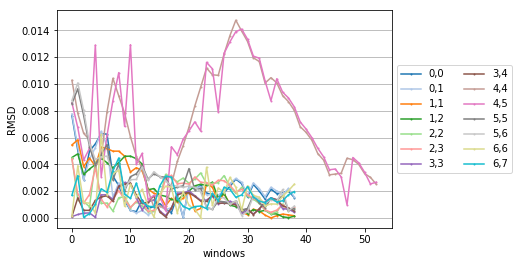

In [18]:
seekr.plots.plot_window_rmsd(N_conv, conv_intervals, window)
seekr.plots.plot_window_rmsd(R_conv, conv_intervals, window)
min_anchor_times = seekr.analyze.calc_RMSD_conv(model, N_conv, R_conv, conv_intervals, window, cutoff, conv_windows)
print(min_anchor_times)

In [19]:
num = 500
skip = 100
stride = 100

In [ ]:
print()

In [20]:
p_equil, N, R, T, T_tot, Q, n_conv, r_conv, k_cell= seekr.analyze.analyze_kinetics(
     model, bound_dict, max_steps = min_anchor_times, verbose=True,)
k_off_list, running_avg, running_std,k_on_list, k_on_avg_list, k_on_std_list = seekr.analyze.monte_carlo_milestoning_error(
    model, bound_dict, Q, N, R, p_equil,T_tot, num = num, skip =skip,stride = stride, verbose=False)
#seekr.plots.MCMC_conv(running_avg, running_std)

max_steps [33500000.        0.        0. 30000000.        0. 39000000. 39000000.
        0.        0.        0.        0.        0.        0.        0.
        0.]
Anchor 0_0_site1_-0.0_-0.1_1.0
counts {'0': {0: {1: 1142}, 1: {0: 1142}}}
times {'0': {0: 4.1947559999999925e-08, 1: 2.4799400000000014e-08}}
cell times {0: 6.701692000000001e-08}
Anchor 1_1_site1_-0.1_-0.3_2.5
counts {}
times {}
cell times {0: 6.701692000000001e-08, 1: 1.118e-11}
Anchor 2_2_site1_-0.1_-0.5_4.0
counts {}
times {}
cell times {0: 6.701692000000001e-08, 1: 1.118e-11, 2: 5.8600000000000005e-12}
Anchor 3_3_site1_-0.2_-0.7_5.5
counts {'3': {3: {4: 1327}, 4: {3: 1327}}}
times {'3': {3: 4.149595999999997e-08, 4: 1.841962000000002e-08}}
cell times {0: 6.701692000000001e-08, 1: 1.118e-11, 2: 5.8600000000000005e-12, 3: 6.000048e-08}
Anchor anchor_4
counts {}
times {}
cell times {0: 6.701692000000001e-08, 1: 1.118e-11, 2: 5.8600000000000005e-12, 3: 6.000048e-08, 4: 8.84e-12}
Anchor anchor_5
counts {'5': {5: {6: 911}, 6:

LinAlgError: Singular matrix

In [ ]:
MFPT = T[0]
k_off = 1/MFPT
print("MLE k_off", '%.2E' % Decimal(k_off))
k_off_std = np.std(k_off_list)
k_on_std = np.std(k_on_list)
print("k_off entries:", len(k_off_list))
print("avg k off", '%.2E' % Decimal(np.average(k_off_list))," +- ", '%.2E' % Decimal(k_off_std), " s^-1") 
print("avg k on", '%.2E' % Decimal(np.average(k_on_list))," +- ", '%.2E' % Decimal(k_on_std), " M^-1 s^-1")